In [2]:
#Imports
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
#File paths
this_dir = os.getcwd()
#ex_dir = 
print(this_dir)

/home/stba7609/NII_nebular_phase/plots


In [4]:
#Read in the data
ex_prespectrum = np.loadtxt('SN2011ei_pre_corr.csv', delimiter = ',')
ex_postspectrum = np.loadtxt('SN2011ei_discovery329.csv', delimiter = ',')

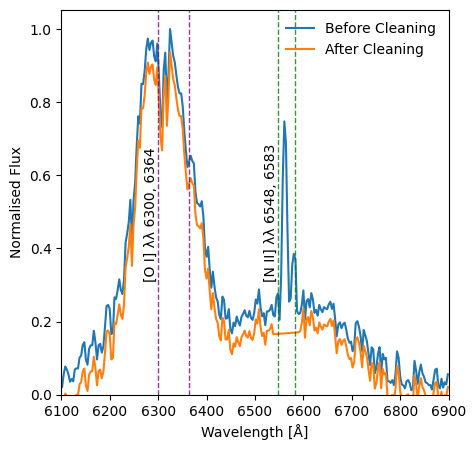

In [7]:
#Create plots

fig, ax = plt.subplots(1, figsize = (5, 5))

trans = ax.get_xaxis_transform() #For easier plotting of labels of vertical lines later

#Define wl and flux
wl_pre, flux_pre = ex_prespectrum[:, 0], ex_prespectrum[:, 1]
wl_post, flux_post = ex_postspectrum[:, 0], ex_postspectrum[:, 1]

#Zoom in on the OI and NII doublets
wl_pre, flux_pre = wl_pre[(wl_pre > 6100) * (wl_pre < 6900)], flux_pre[(wl_pre > 6100) * (wl_pre < 6900)]/np.max(flux_pre[(wl_pre > 6100) * (wl_pre < 6900)])
wl_post, flux_post = wl_post[(wl_post > 6100) * (wl_post < 6900)], flux_post[(wl_post > 6100) * (wl_post < 6900)]/np.max(flux_post[(wl_post > 6100) * (wl_post < 6900)])

#Remove the continuum in the post spectrum

left_continuum_wl =  (wl_post < 6150) * (wl_post > 6100)
right_continuum_wl = (wl_post < 6900) * (wl_post > 6850)
left_continuum_flux_mean = np.mean(flux_post[left_continuum_wl])
right_continuum_flux_mean = np.mean(flux_post[right_continuum_wl])

coefficient = (right_continuum_flux_mean-left_continuum_flux_mean) / (6875-6125)
continuum_flux_final = coefficient*(wl_post-6875) + right_continuum_flux_mean

corrected_flux = flux_post-continuum_flux_final


#Plot it
ax.plot(wl_pre, flux_pre, label = 'Before Cleaning')
ax.plot(wl_post, corrected_flux, label = 'After Cleaning')

#ax.axvline(x = 6540, linestyle = '--', c = 'k', alpha = 0.3)
#ax.axvline(x = 6590, linestyle = '--', c = 'k', alpha = 0.3)



line_names = np.array(["[O I] λλ 6300, 6364", "[N II] λλ 6548, 6583"])
line_wl = np.array([6300, 6548])
colours = ['purple', 'green']

for i in range(len(line_names)):
    ax.axvline(x = line_wl[i], linestyle = '--', c = colours[i], lw = 1, alpha = 0.8)
    fig.text(x = line_wl[i]-30, y = 0.3, s = line_names[i], transform = trans, rotation = 90)
    
ax.axvline(x = 6363, linestyle = '--', c = 'purple', lw = 1, alpha = 0.8)
ax.axvline(x = 6583, linestyle = '--', c = 'green', lw = 1, alpha = 0.8)

ax.set_xlim(6100, 6900)
ax.set_ylim(bottom = 0)

ax.set_xlabel('Wavelength [Å]')
ax.set_ylabel('Normalised Flux')

ax.legend(frameon = False)

plt.savefig('Figure_x_Halpha_Removal.pdf', dpi = 300, bbox_inches="tight")

plt.show()